# DecisionTreeClassifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('A.csv')
data.head()

sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0

In [3]:
df=data.dropna()
df

sr      rr       t      lm      bo     rem   sr.1     hr  sl
0    93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3
1    91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3
2    60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1
3    85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3
4    48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0
..      ...     ...     ...     ...     ...     ...    ...    ...  ..
625  69.600  20.960  92.960  10.960  90.960   89.80  3.440  62.40   2
626  48.440  17.376  98.064   6.752  96.376   73.76  8.376  53.44   0
627  97.504  27.504  86.880  17.752  84.256  101.88  0.000  78.76   4
628  58.640  19.728  95.728   9.728  94.592   84.32  6.728  59.32   1
629  73.920  21.392  93.392  11.392  91.392   91.96  4.088  63.48   2

[630 rows x 9 columns]

In [4]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [5]:
x = df.drop(labels='sl', axis=1)
y = df.loc[:,'sl']

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
print("Number of training dataset : ", len(x_train))
print("Number of test dataset     : ", len(x_test))
print("Total number of dataset    : ", len(x_train)+len(x_test))

Number of training dataset :  504
Number of test dataset     :  126
Total number of dataset    :  630


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [8]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predicted = DTC.predict(x_test)

In [9]:
cr = classification_report(y_test,predicted)
print('Classification report of DecisionTreeClassifier Result is:\n',cr)
print("\n")

Classification report of DecisionTreeClassifier Result is:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        25
           2       1.00      0.96      0.98        25
           3       0.90      1.00      0.95        26
           4       1.00      0.92      0.96        25

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126





In [10]:
cm = confusion_matrix(y_test,predicted)
print('Confusion Matrix result of DecisionTreeClassifier is:',cm)
print("\n")

Confusion Matrix result of DecisionTreeClassifier is: [[25  0  0  0  0]
 [ 1 24  0  0  0]
 [ 0  0 24  1  0]
 [ 0  0  0 26  0]
 [ 0  0  0  2 23]]




In [11]:
accuracy = cross_val_score(DTC, x, y, scoring='accuracy')
print('Cross validation test results of accuracy:', accuracy)
print("\n")

Cross validation test results of accuracy: [0.97619048 0.97619048 0.98412698 1.         1.        ]




In [12]:
a = accuracy.mean() * 100
print("Accuracy Result of DecisionTreeClassifier is:",a)

Accuracy Result of DecisionTreeClassifier is: 98.73015873015873


Confusion matrix-DecisionTreeClassifier:
[[25  0  0  0  0]
 [ 1 24  0  0  0]
 [ 0  0 24  1  0]
 [ 0  0  0 26  0]
 [ 0  0  0  2 23]]


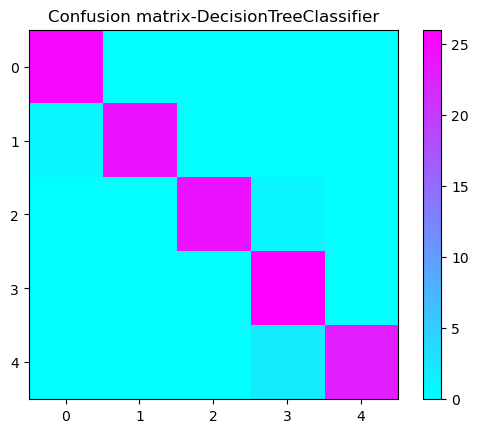

In [13]:
def plot_confusion_matrix(cm, title='Confusion matrix-DecisionTreeClassifier', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('Confusion matrix-DecisionTreeClassifier:')
print(cm)
plot_confusion_matrix(cm)

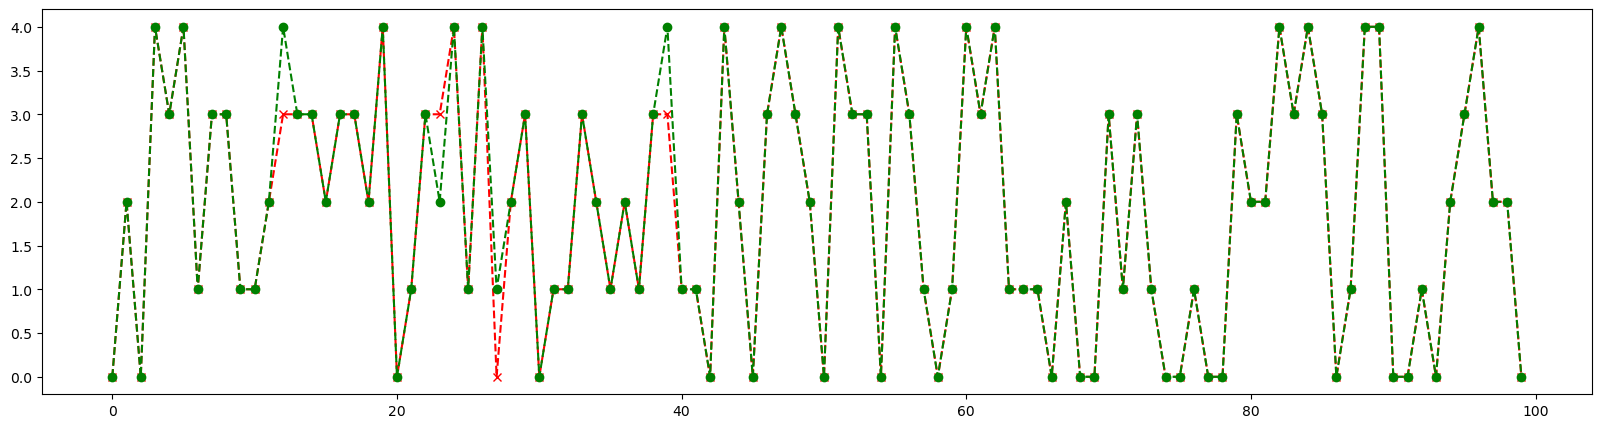

In [14]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()